# Задание

На основе выбранных продуктов из первого вебинара, выберите 2 A/B-теста и составьте план эксперимента, чтобы избежать Peeking Problem

Распишите, какие метрики и как вы будете анализировать

In [1]:
# импорт необходимых библиотек
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from tqdm import tqdm

import scipy.stats as st
from statsmodels.stats.power import tt_ind_solve_power
from statsmodels.stats.power import zt_ind_solve_power
from statsmodels.stats.proportion import proportion_effectsize
from statsmodels.stats import proportion
from statsmodels.stats.meta_analysis import effectsize_smd

# импорт необходимых библиотек
from statsmodels.stats.power import tt_ind_solve_power, zt_ind_solve_power
from statsmodels.stats.proportion import proportion_effectsize
from statsmodels.stats.meta_analysis import effectsize_smd
from typing import Union
import plotly.graph_objects as go
from scipy import stats
from math import asin
import numpy as np

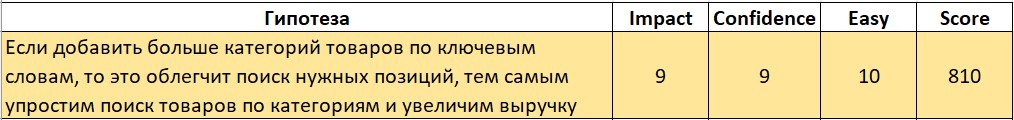

### Дизайн эксперимент:
#### 1. Гипотеза

Если добавить больше категорий товаров по ключевым словам, то это облегчит поиск нужных позиций, тем самым упростим поиск товаров по категориям и увеличим выручку

#### 2. Что делаем

<u>Контрольная группа</u> - оставляем текущие параментры поиска

<u>Тестовая группа</u> - внедряем в приложение новые группы товаров по ключевым словам (например: подарок на день рождения, подарок на 8 марта, подарки детям, подросткам) 

#### 3. На каких пользователях тестируем
На новых пользователях приложения

#### 4. Ключевые метрики для оценки эксперимента
- Конверсия в покупку, средний чек
- Время, проведенное на сайте
- Число переходов, конверсия подписок, увеличит время просмотра, тк он будет быстрее находить что ему нужно

#### 5. Ожидаемый эффект
- Упрощение поиска нужных товаров
- БОльший приток клиентов
- Увеличение выручки

#### 6. План действий в зависимости отрезультатов  эксперимента
- Если наш эксперимент будет положительным и мы зафиксируем ожидаемое улучшение в ключевых метриках и не посадим добавочные, то масштабируем изменение и расширим на всех пользователях
- Если основные метрики падают или растут недостаточно, либо добавочные метрики падают, откатываем эксперимент

Если добавить больше категорий товаров по ключевым словам, то это облегчит поиск нужных позиций на 10%, упростим поиск товаров по категориям, тем самым отток клиентов уменьшим на 10%. Средний трафик 7000 человек в день. Посчитайте сколько дней необходимо держать эксперимент при alpha = 5% и beta = 20%.

In [3]:
def calc_proportion_es(prob1: float, prob2: float):
    
    return abs(proportion_effectsize(prob1, prob2))

def calc_proportion_es_alt(conv1: float, conv2:float, prob1:float, prob2: float):
    
    return 2  * asin(np.sqrt(conv1/nobs1)) - 2 * asin(np.sqrt(conv2/nobs2))

def calc_continuous_es(mean_control: Union[float, int],
                       std_control: Union[float, int],
                       mean_test: Union[float, int],
                       std_test: Union[float, int]):
    
    return abs(effectsize_smd(mean_control,
                              std_control,
                              1e4,
                              mean_test,
                              std_test,
                              1e4)[0])

def calc_continuous_es_alt(mean_control: Union[float, int],
                           std_control: Union[float, int],
                           mean_test: Union[float, int],
                           std_test: Union[float, int]):
    
    effect_size = (mean_test - mean_control) / ((std_control**2 + std_test**2) / 2) ** 0.5
    return effect_size
    
def calc_sample_size_continuous(effect_size: float,
                     alpha: float = .05,
                     beta: float = .2,
                     ratio: Union[float, int] = 1):
    
    n = tt_ind_solve_power(effect_size=effect_size,
                           alpha=alpha,
                           power=(1 - beta),
                           ratio=ratio,
                  )
    return int(n * 2)

def calc_sample_size_proportion(effect_size: float,
                     alpha: float = .05,
                     beta: float = .2,
                     ratio: Union[float, int] = 1):
    
    n = zt_ind_solve_power(effect_size=effect_size,
                           alpha=alpha,
                           power=(1 - beta),
                           ratio=ratio,
                  )
    return int(n * 2)

In [25]:
сhurn_rate_1, сhurn_rate_2 = 0.10, 0.11


es_prop = calc_proportion_es(сhurn_rate_1, сhurn_rate_2)
es_prop

0.03262940076737697

In [26]:
calc_sample_size_proportion(es_prop)

29488

In [18]:
dau = 7000

In [27]:
result = 29488 / dau
result

4.212571428571429

Длительность эксперимента д.б. 4 дня